# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Introduction
Brief explanation of each column present in the dataset:

SEQN = Respondent sequence number

DMDEDUC2 = Education level

RIDAGEYR = Age (years)

BMXHT = Height (cm)

BMXWT = Weight (kg)

SMQ020 = Smoking

BMXBMI = BMI

RIAGENDR = Gender

### Loading Data

In [2]:
data = pd.read_csv("NHANES.csv")
data.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [3]:
data.shape

(5735, 28)

In [4]:
# We will be working on particular features of this dataset
data = data[['SMQ020','RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI']]
data.head()

,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


In [5]:
# exploring the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMQ020    5735 non-null   int64  
 1   RIAGENDR  5735 non-null   int64  
 2   RIDAGEYR  5735 non-null   int64  
 3   DMDEDUC2  5474 non-null   float64
 4   BMXWT     5666 non-null   float64
 5   BMXHT     5673 non-null   float64
 6   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 313.8 KB


In [6]:
# Changing feature names for ease of understanding

data.columns = ['smoking','gender', 'age','education','weight','height','bmi']
data.head()

,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


After exploring the data, I observed that there are 5735 rows and 7 columns.

The dataset consists of 3 features of catagorical data and 4 features of numerical data.

Numerical = age, weight, height, bmi

Categorical = smoking, gender, education

### Data Cleaning

In [7]:
# Check for Null Values
data.isnull().sum()

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64

In [8]:
# for analysis purpose i will be removing all the null values rather than filling them with mean or median

data.dropna(inplace=True)

In [9]:
# Checking for Duplicates
data.duplicated().sum()

np.int64(0)

In [10]:
data.shape

(5406, 7)

In [11]:
# Looking for any outliers present in the numerical data

data[['age','weight','height','bmi']].describe()

,age,weight,height,bmi
count,5406.000000,5406.000000,5406.000000,5406.000000
mean,49.390122,81.715594,166.055679,29.541861
std,17.640915,21.775173,10.107149,7.076574
min,20.000000,32.400000,129.700000,14.500000
25%,34.000000,66.300000,158.600000,24.500000
50%,49.000000,78.500000,165.900000,28.500000
75%,64.000000,93.200000,173.400000,33.200000
max,80.000000,198.900000,202.700000,67.300000


### Data Visualising

<Axes: xlabel='bmi', ylabel='Count'>

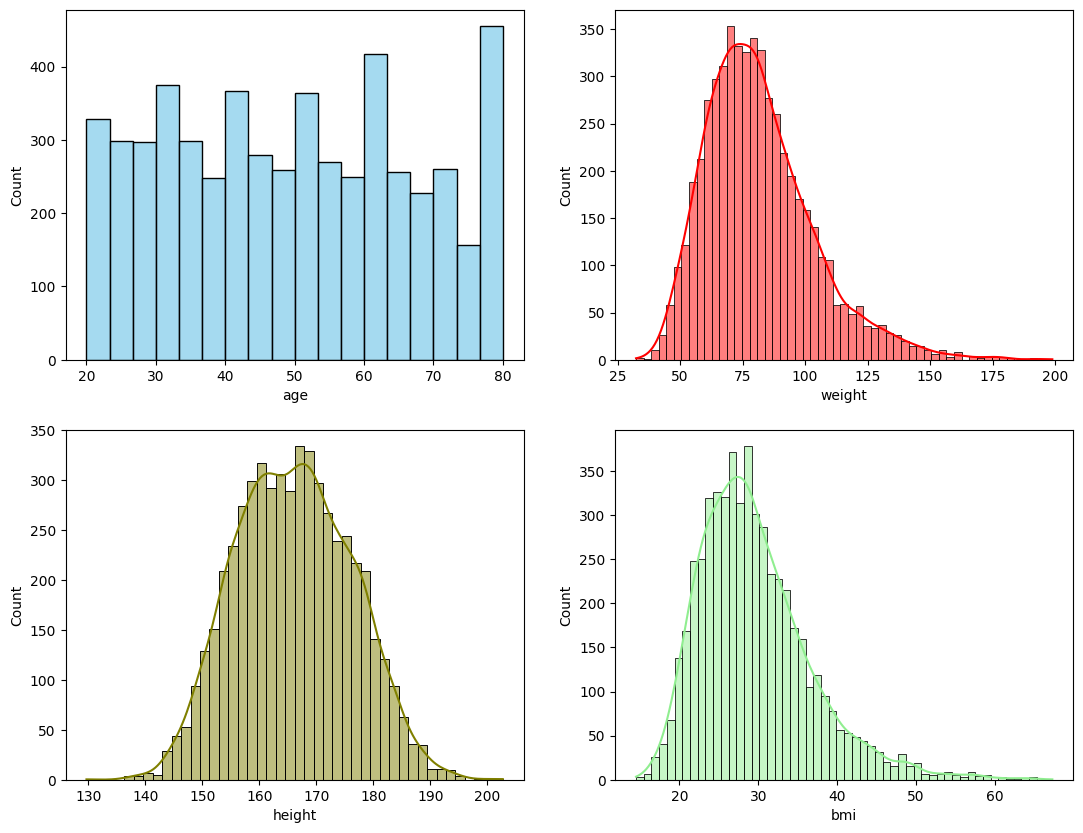

In [12]:
# Histogram for numerical features
fig, axs = plt.subplots(2,2, figsize=(13,10))
sns.histplot(data=data, x='age',color='skyblue',ax=axs[0,0])
sns.histplot(data=data, x='weight',color='red',ax=axs[0,1],kde=True)
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= data, x="bmi", kde=True, color="lightgreen", ax=axs[1,1])

From the above visualisation I observed that weight and BMI are slightly right-skewed

<Axes: xlabel='bmi'>

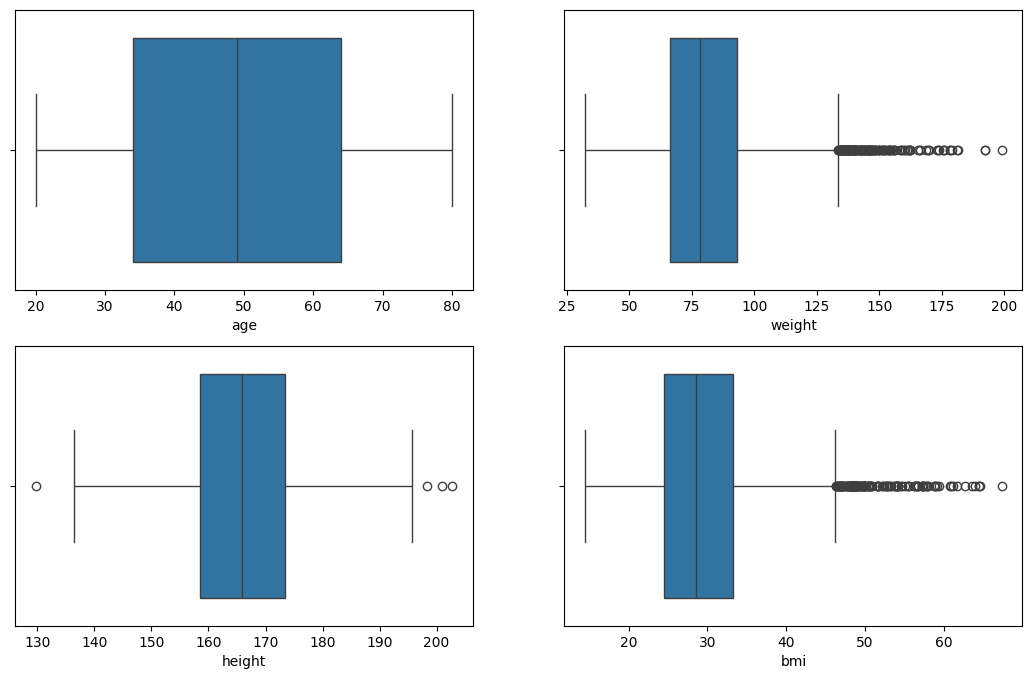

In [13]:
# Visualising and Spotting Outliers

fig, axs = plt.subplots(2,2, figsize=(13,8))
sns.boxplot(data=data, x='age',ax = axs[0,0])
sns.boxplot(data=data, x='weight',ax = axs[0,1])
sns.boxplot(data=data, x='height',ax = axs[1,0])
sns.boxplot(data=data, x='bmi',ax = axs[1,1])

Based on the Box plot, surprisingly age variable has no outliers. Height has very minute outliers.

On the otherhand, Weight and BMI have more outliers on the upper side

#### Calculating Percentiles

In [14]:
# Height
qh25 = np.percentile(data['height'],25)
qh50 = np.percentile(data['height'],50)
qh75 = np.percentile(data['height'],75)

# inter quartile range:
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

#Filter the data inside IQR
data = data[(data['height']>minh) & (data['height']<maxh)]

In [15]:
# Weight

qw25 = np.percentile(data['weight'],25)
qw50 = np.percentile(data['weight'],50)
qw75 = np.percentile(data['weight'],75)

# inter quartile range:
iqrw = qw75-qw25
maxw = qw75 + 1.5*iqrw

#Filter the data inside IQR
data = data[data['weight']<maxw]

In [16]:
# BMI

qb25 = np.percentile(data['bmi'],25)
qb50 = np.percentile(data['bmi'],50)
qb75 = np.percentile(data['bmi'],75)

# inter quartile range:
iqrb = qb75-qb25
maxb = qb75 + 1.5*iqrb

#Filter the data inside IQR
data = data[data['bmi']<maxb]

In [17]:
data.shape

(5171, 7)

### Visualising Data post removing outliers

<Axes: xlabel='bmi', ylabel='Count'>

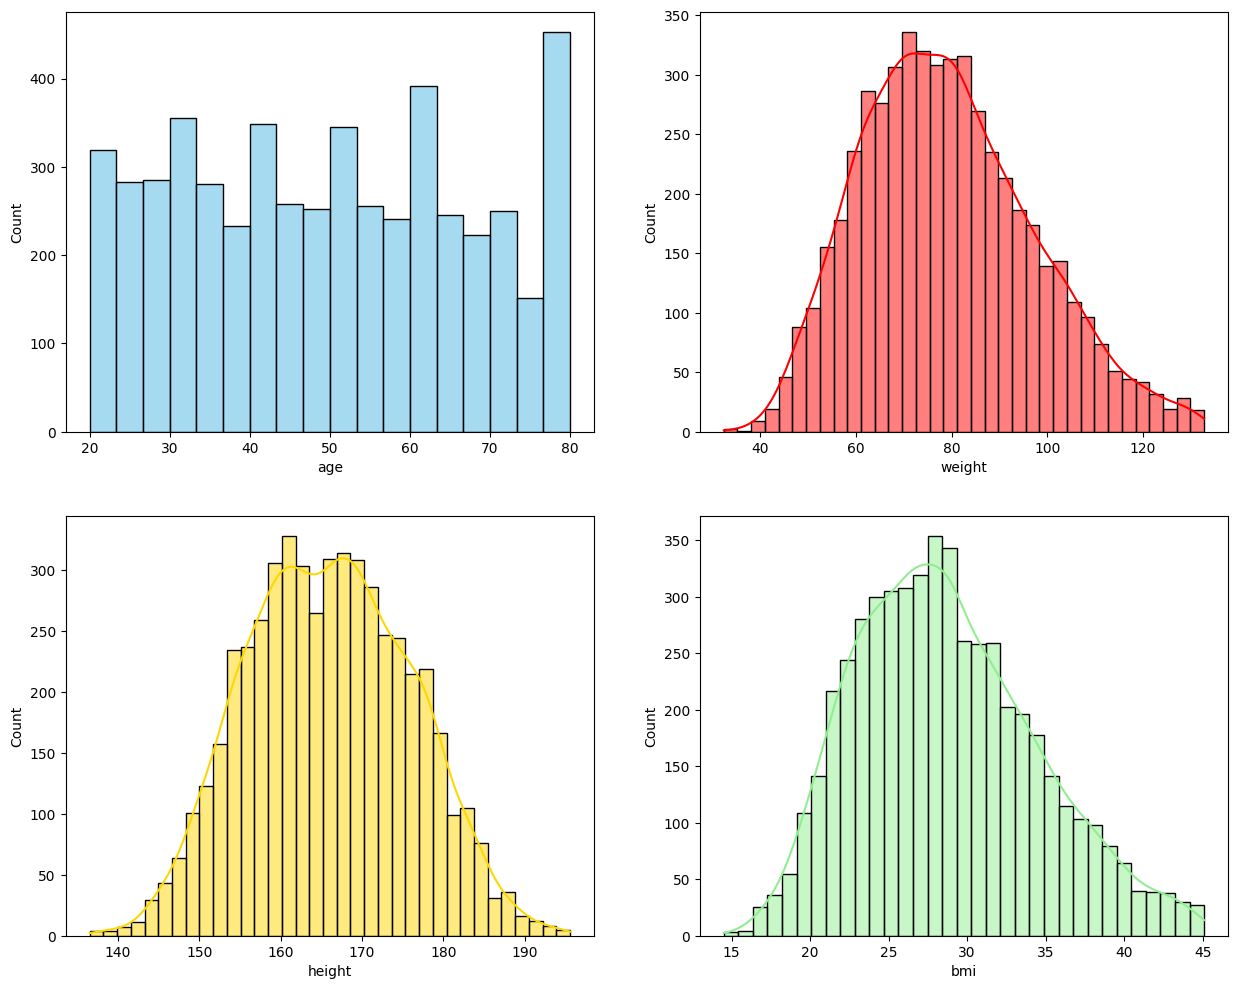

In [26]:
fig, axs = plt.subplots(2,2, figsize=(15, 12))

sns.histplot(data = data, x = 'age', color = 'skyblue', ax=axs[0,0])   
sns.histplot(data = data, x="weight", kde=True, color="red", ax=axs[0,1])
sns.histplot(data = data, x="height", kde=True, color="gold", ax=axs[1,0])
sns.histplot(data = data, x="bmi", kde=True, color="lightgreen", ax=axs[1,1])

<Axes: ylabel='bmi'>

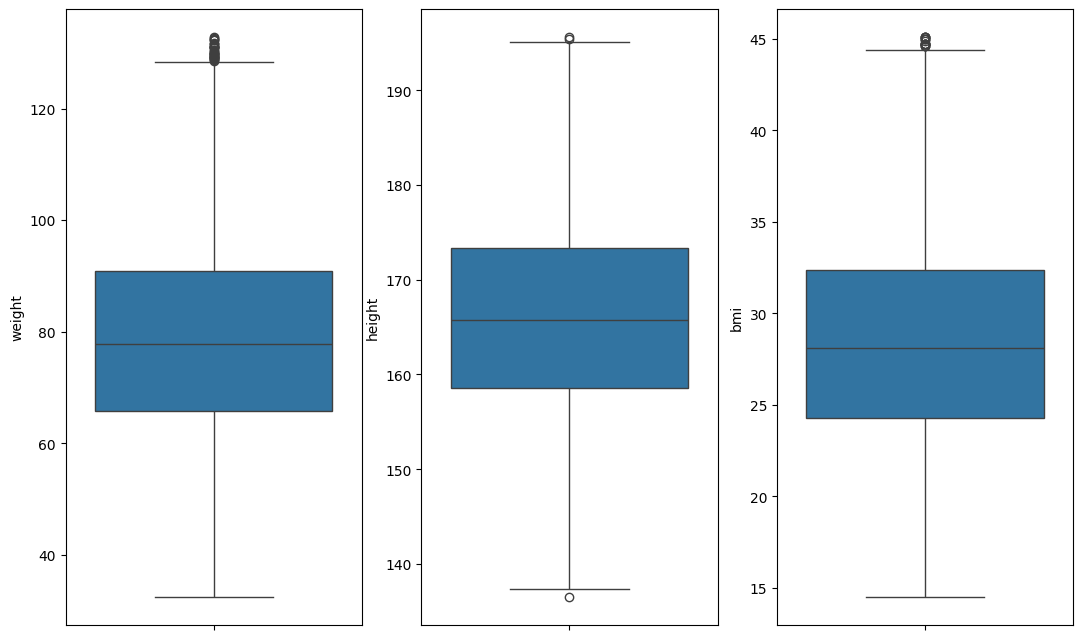

In [36]:
# Box plot
fig, axs = plt.subplots(1,3, figsize=(13, 8))

sns.boxplot(data['weight'], ax = axs[0])
sns.boxplot(data['height'], ax = axs[1])
sns.boxplot(data['bmi'], ax = axs[2])


### Feature Engineering

In [38]:
# One Hot encoding

# smoking
data['smoking'] = data['smoking'].replace({1 : 'Yes', 2: 'No'})

# gender
data['gender'] = data['gender'].replace({1 : 'Male', 2 : 'Female'})

data['education'] = data['education'].replace({1 : '1-8th grade', 2: '9-11th grade', 3 : 'High School', 4 : ' Junior College', 5 : 'College' })

In [39]:
data.head()

,smoking,gender,age,education,weight,height,bmi
0,Yes,Male,62,College,94.8,184.5,27.8
1,Yes,Male,53,High School,90.4,171.4,30.8
2,Yes,Male,78,High School,83.4,170.1,28.8
3,No,Female,56,College,109.8,160.9,42.4
4,No,Female,42,Junior College,55.2,164.9,20.3


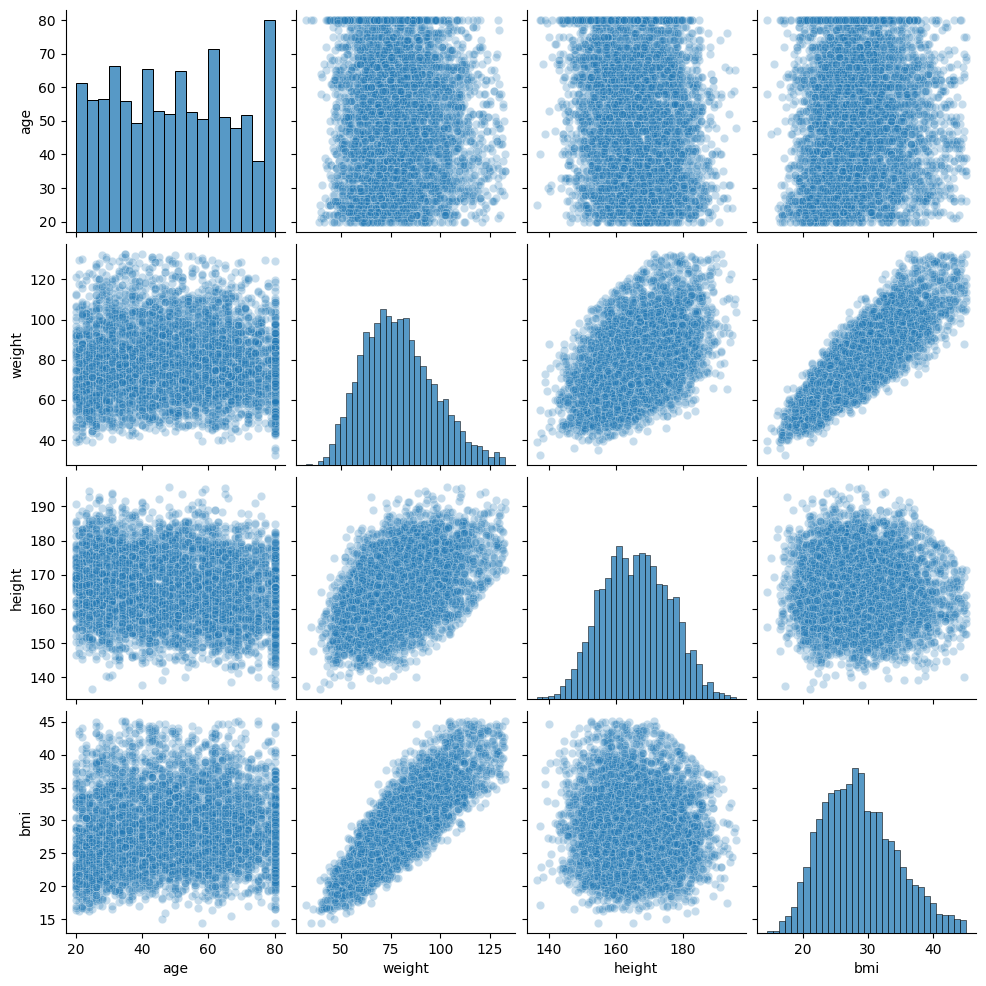

In [45]:
# Pairplot for Correlation of numerical variables
sns.pairplot(data,plot_kws=dict(alpha=.25))

From the above pair plot, I observed that weight and bmi has a positive correlation. Height and Weight also has a minute correlation.

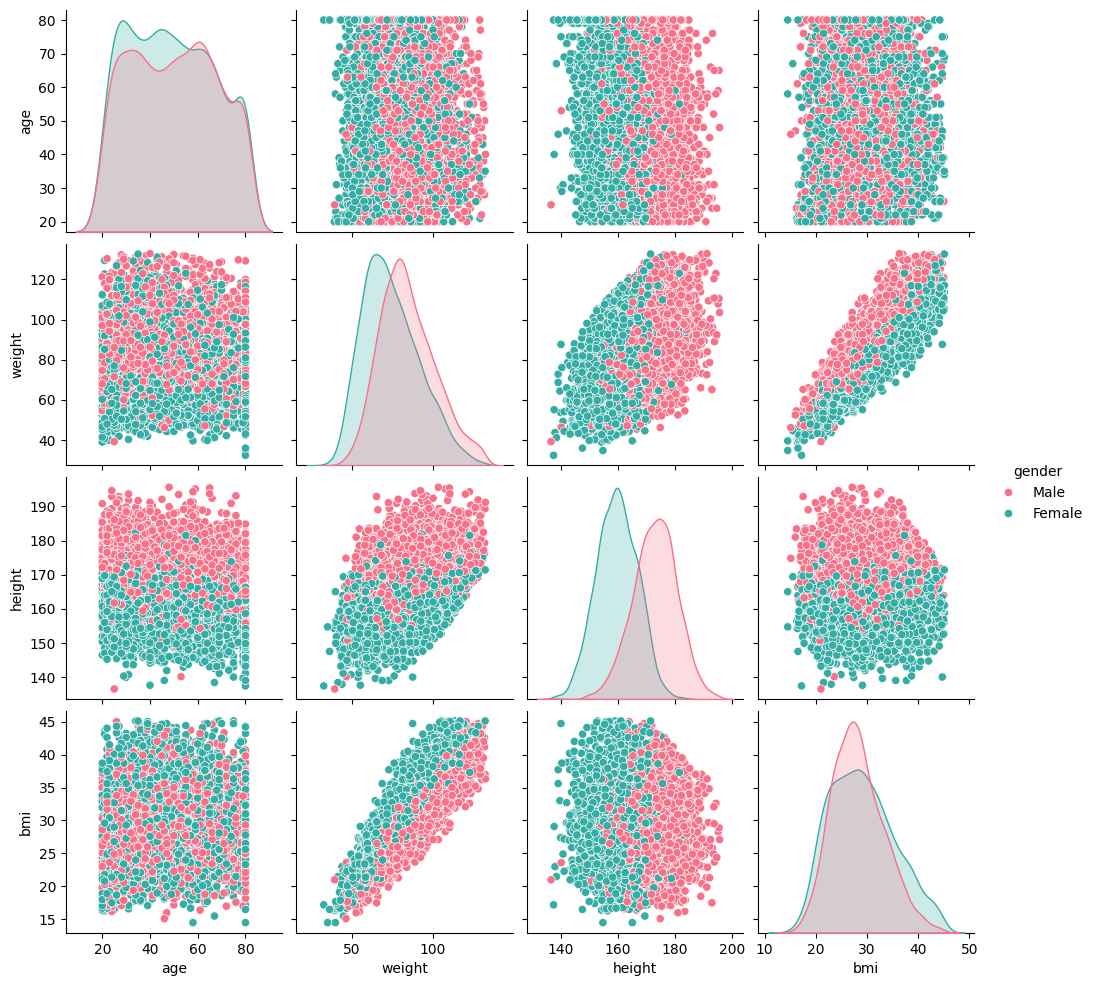

In [46]:
# Pairplot of numerical variables divided by gender
sns.pairplot(data, hue = 'gender', palette = 'husl')

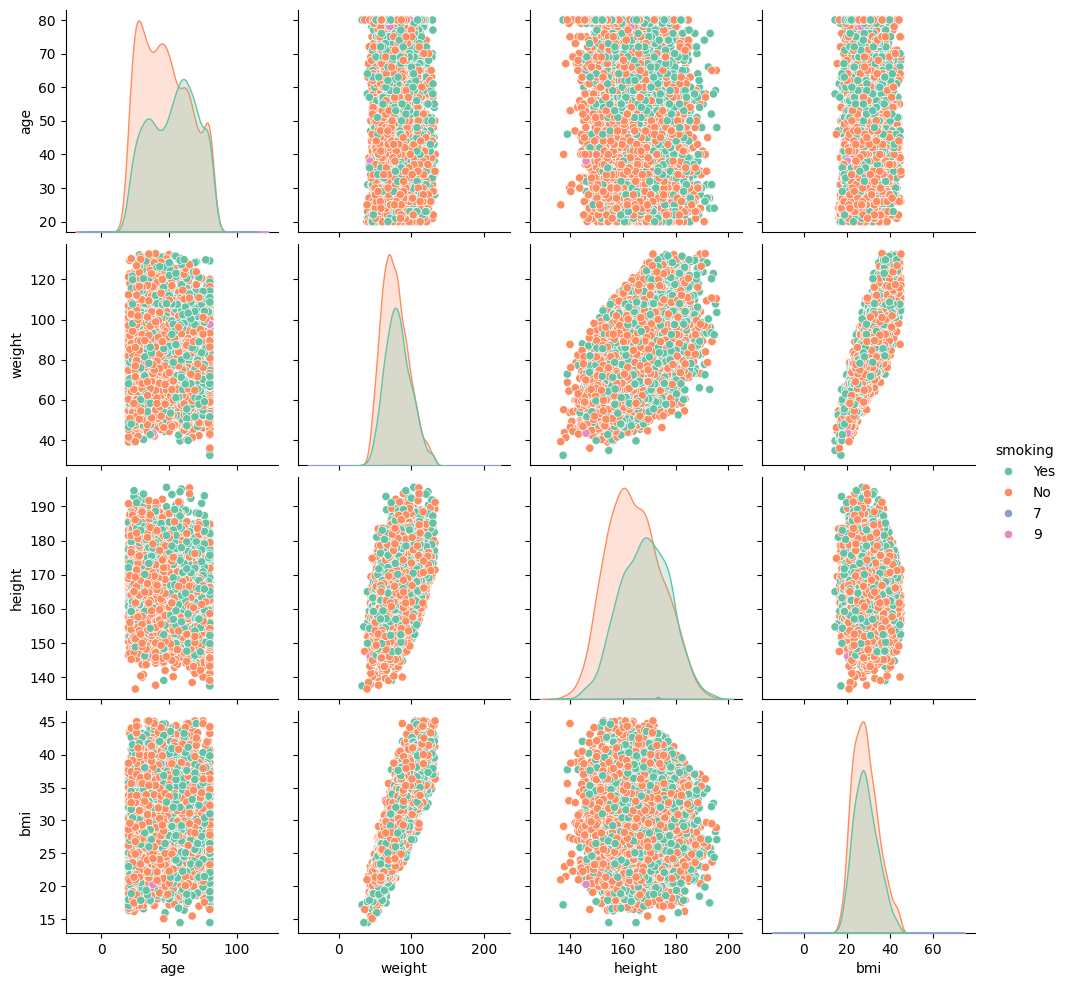

In [48]:
# Pairplot of numerical variables divided by smoking habit
sns.pairplot(data, hue = 'smoking', palette = 'Set2')